In [17]:
import numpy as np
import pandas as pd
import string
import os
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.options.display.max_rows = 5

In [2]:
dpath = '/Users/sai/Documents/00 NEU/Semester 1/1 DS 5110 - Introduction to Data Management and Processing/Project/NYC-Taxi-Data-Analysis/data_sampled/green/'
shp_path = '/Users/sai/Downloads/taxi_zones/'
curr_dir = os.getcwd()
csv_fnames = list(os.walk(dpath))[0][2]
csv_fnames

['green_tripdata_2017-09.csv',
 'green_tripdata_2015-08.csv',
 'green_tripdata_2015-09.csv',
 'green_tripdata_2014-12.csv',
 'green_tripdata_2014-06.csv',
 'green_tripdata_2018-06.csv',
 'green_tripdata_2018-12.csv',
 'green_tripdata_2016-03.csv',
 'green_tripdata_2016-02.csv',
 'green_tripdata_2018-07.csv',
 'green_tripdata_2014-07.csv',
 'green_tripdata_2014-05.csv',
 'green_tripdata_2014-11.csv',
 'green_tripdata_2018-11.csv',
 'green_tripdata_2018-05.csv',
 'green_tripdata_2016-01.csv',
 'green_tripdata_2018-04.csv',
 'green_tripdata_2018-10.csv',
 'green_tripdata_2014-10.csv',
 'green_tripdata_2014-04.csv',
 'green_tripdata_2013-09.csv',
 'green_tripdata_2016-05.csv',
 'green_tripdata_2016-11.csv',
 'green_tripdata_2018-01.csv',
 'green_tripdata_2016-10.csv',
 'green_tripdata_2016-04.csv',
 'green_tripdata_2014-01.csv',
 'green_tripdata_2013-08.csv',
 'green_tripdata_2014-03.csv',
 'green_tripdata_2016-12.csv',
 'green_tripdata_2016-06.csv',
 'green_tripdata_2018-03.csv',
 'green_

In [3]:
for fname in csv_fnames:
    with open(dpath+fname, 'r') as f:
        header = f.readline()
        print(fname)
        colnames = header.split(',')
        colnames[-1] = colnames[-1][:-1]
        print(colnames)
    break

green_tripdata_2017-09.csv
['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type']


In [95]:
fname1 = 'green_tripdata_2014-09.csv'
fname2 = 'green_tripdata_2018-09.csv'

df1 = pd.read_csv(dpath+fname1)
df1.columns = [col.lower().strip() for col in df1.columns]

df2 = pd.read_csv(dpath+fname2)
df1
df2.columns = [col.lower().strip() for col in df2.columns]

example_concat_df = pd.concat([df1, df2], axis=0, ignore_index=True, sort=True).columns

concat_cols = list(pd.concat([df1, df2], axis=0, ignore_index=True, sort=True).columns)

example_concat_df

Index(['dolocationid', 'dropoff_latitude', 'dropoff_longitude', 'ehail_fee',
       'extra', 'fare_amount', 'improvement_surcharge',
       'lpep_dropoff_datetime', 'lpep_pickup_datetime', 'mta_tax',
       'passenger_count', 'payment_type', 'pickup_latitude',
       'pickup_longitude', 'pulocationid', 'ratecodeid', 'store_and_fwd_flag',
       'tip_amount', 'tolls_amount', 'total_amount', 'trip_distance',
       'trip_type', 'vendorid'],
      dtype='object')

In [111]:
imp_cols = ['vendorid', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 
            'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 
            'dropoff_latitude', 'pulocationid', 'dolocationid', 'trip_distance',
            'trip_type', 'payment_type', 'total_amount', 'fare_amount', 
            'tip_amount', 'extra', 'tolls_amount', 'improvement_surcharge', 
            'ehail_fee', 'mta_tax']
rem_cols = list(set(concat_cols) - set(imp_cols))
prefer_cols_ord = imp_cols + rem_cols
rem_cols

['ratecodeid', 'passenger_count', 'store_and_fwd_flag']

In [90]:
df2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-09-08 00:17:10,2018-09-08 00:23:38,N,1,25,106,1,1.25,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0
1,1,2018-09-10 12:13:53,2018-09-10 12:17:57,N,1,75,236,1,0.40,4.5,0.0,0.5,1.05,0.0,NaN,0.3,6.35,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66669,2,2018-09-16 11:53:32,2018-09-16 11:59:09,N,1,43,236,1,1.20,6.0,0.0,0.5,1.00,0.0,NaN,0.3,7.80,1,1.0
66670,2,2018-09-06 22:09:33,2018-09-06 22:18:24,N,1,75,238,5,1.71,8.5,0.5,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0


In [65]:
list(set(df1.columns) - set(df2.columns))

['dropoff_longitude',
 'pickup_latitude',
 'dropoff_latitude',
 'pickup_longitude']

In [66]:
list(set(df2.columns) - set(df1.columns))

['pulocationid', 'improvement_surcharge', 'dolocationid']

#### 
1. df1 has 1 column more than df2 (lat, lon, lat, lon vs. locid, locid, surcharge).
2. df1 and df2 share 16 columns (df1 = 16+4, df2 = 16+3).
3. concat df would have 23 columns (16 + 4 + 3).

###  Loop to concat all files

In [103]:
# Initializing concatenated dataframe and timers
stime = timer()
concat_df = pd.read_csv(dpath + csv_fnames[0])
concat_df.columns = [col.lower().strip() for col in concat_df.columns]

concat_dur = [timer()-stime]
concat_obs = [concat_df.shape[0]]

for idx, fname in enumerate(csv_fnames[1:]):
    print("\n------")
    print("File {0} of {1}".format(idx + 2, len(csv_fnames)))
    print("BEFORE CONCAT: Line count: {}".format(concat_df.shape[0]))

    stime_ = timer()

    curr_df = pd.read_csv(dpath + fname)
    curr_df.columns = [col.lower().strip() for col in curr_df.columns]
    concat_df = pd.concat([concat_df, curr_df], axis=0, ignore_index=True, sort=True)

    etime_ = timer()
    concat_dur.append(etime_-stime_)
    concat_obs.append(curr_df.shape[0])

    print("AFTER CONCAT: Line count: {}".format(concat_df.shape[0]))
    print("Time elapsed: {0:.3f}".format(etime_ - stime_))
    print("Observations added:", str(curr_df.shape[0]))
    print("------\n")

concat_df = concat_df[prefer_cols_ord]
print("TOTAL TIME OF CONCATENATION: {0:.3f}".format(timer() - stime))

# Write data to .csv
concat_df.to_csv(dpath + 'tripdata_green_samp.csv', index=False)



------
File 2 of 64
BEFORE CONCAT: Line count: 88246
AFTER CONCAT: Line count: 241480
Time elapsed: 0.568
Observations added: 153234
------


------
File 3 of 64
BEFORE CONCAT: Line count: 241480
AFTER CONCAT: Line count: 390973
Time elapsed: 0.660
Observations added: 149493
------


------
File 4 of 64
BEFORE CONCAT: Line count: 390973
AFTER CONCAT: Line count: 555552
Time elapsed: 0.727
Observations added: 164579
------


------
File 5 of 64
BEFORE CONCAT: Line count: 555552
AFTER CONCAT: Line count: 689328
Time elapsed: 0.842
Observations added: 133776
------


------
File 6 of 64
BEFORE CONCAT: Line count: 689328
AFTER CONCAT: Line count: 763265
Time elapsed: 0.685
Observations added: 73937
------


------
File 7 of 64
BEFORE CONCAT: Line count: 763265
AFTER CONCAT: Line count: 831802
Time elapsed: 0.752
Observations added: 68537
------


------
File 8 of 64
BEFORE CONCAT: Line count: 831802
AFTER CONCAT: Line count: 989441
Time elapsed: 1.237
Observations added: 157639
------


-

AFTER CONCAT: Line count: 6689800
Time elapsed: 3.854
Observations added: 90624
------


------
File 60 of 64
BEFORE CONCAT: Line count: 6689800
AFTER CONCAT: Line count: 6797977
Time elapsed: 3.512
Observations added: 108177
------


------
File 61 of 64
BEFORE CONCAT: Line count: 6797977
AFTER CONCAT: Line count: 6890551
Time elapsed: 3.877
Observations added: 92574
------


------
File 62 of 64
BEFORE CONCAT: Line count: 6890551
AFTER CONCAT: Line count: 7041401
Time elapsed: 4.302
Observations added: 150850
------


------
File 63 of 64
BEFORE CONCAT: Line count: 7041401
AFTER CONCAT: Line count: 7128818
Time elapsed: 4.006
Observations added: 87417
------


------
File 64 of 64
BEFORE CONCAT: Line count: 7128818
AFTER CONCAT: Line count: 7234764
Time elapsed: 4.007
Observations added: 105946
------

TOTAL TIME OF CONCATENATION: 138.122


In [105]:
concat_df.shape

(7234764, 23)

In [104]:
concat_df

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pulocationid,dolocationid,trip_distance,...,fare_amount,tip_amount,extra,tolls_amount,improvement_surcharge,ehail_fee,mta_tax,ratecodeid,passenger_count,store_and_fwd_flag
0,2,2017-09-27 08:03:46,2017-09-27 08:11:36,NaN,NaN,NaN,NaN,75.0,41.0,1.66,...,8.0,1.0,0.0,0.0,0.3,NaN,0.5,1,1,N
1,2,2017-09-09 22:44:39,2017-09-09 22:46:57,NaN,NaN,NaN,NaN,42.0,42.0,0.67,...,4.5,0.0,0.5,0.0,0.3,NaN,0.5,1,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234762,2,2017-05-06 06:25:00,2017-05-06 06:35:54,NaN,NaN,NaN,NaN,256.0,61.0,2.63,...,11.0,0.0,0.0,0.0,0.3,NaN,0.5,1,1,N
7234763,2,2017-05-05 09:12:51,2017-05-05 09:20:31,NaN,NaN,NaN,NaN,42.0,116.0,0.67,...,6.5,0.0,0.0,0.0,0.3,NaN,0.5,1,1,N


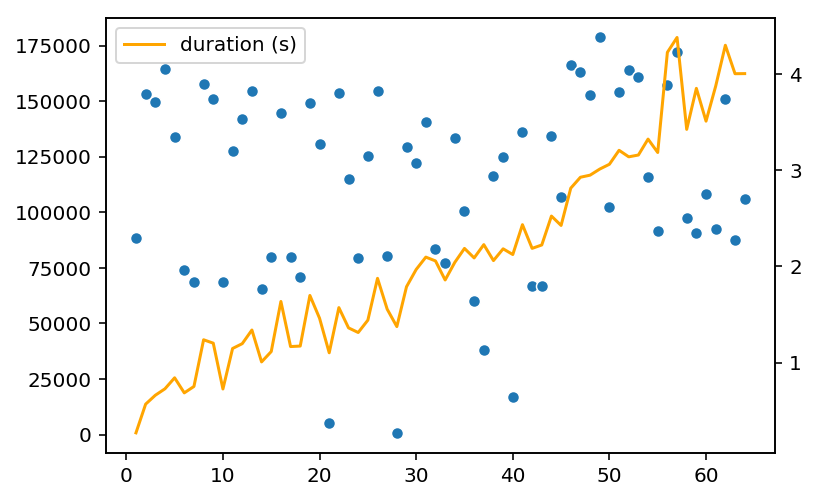

In [106]:
x = range(1,len(concat_obs)+1)
y1 = concat_obs
y2 = concat_dur

fig, ax1 = plt.subplots(1, figsize=(6,4))
sns.scatterplot(x=x, y=y1, ax=ax1)

ax2 = plt.twinx()
sns.lineplot(x=x, y=y2, ax=ax2, color='orange', label='duration (s)', legend='full');

In [107]:
shape = (len(concat_obs),1)
obs = np.array(concat_obs).reshape(shape)

cum_obs = np.roll(obs.cumsum(),1).reshape(shape)
cum_obs[0] = 0
# cum_obs

In [108]:
X = np.hstack((np.ones(obs.shape), obs, cum_obs))
y = np.array(concat_dur)

dur = pd.DataFrame(np.hstack((X, y.reshape(obs.shape))),
                   columns=['X0','curr_obs', 'cum_obs', 'dur'])
dur.head()

,X0,curr_obs,cum_obs,dur
0,1.0,88246.0,0.0,0.269047
1,1.0,153234.0,88246.0,0.567562
2,1.0,149493.0,241480.0,0.659929
3,1.0,164579.0,390973.0,0.727276
4,1.0,133776.0,555552.0,0.841724


In [109]:
X = X[:,[0,2]]

A = np.linalg.inv(X.T.dot(X))
B = X.T.dot(y)

thetas = A.dot(B)
print(thetas)
y_hat = X.dot(thetas)

[3.31138833e-01 5.06427593e-07]


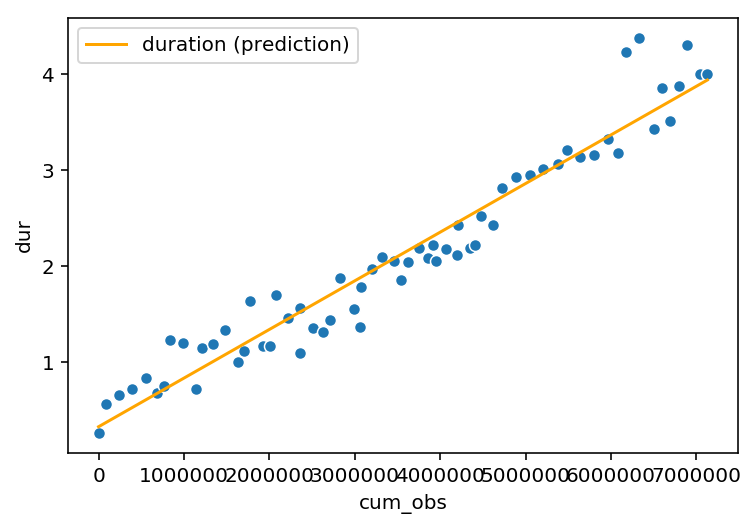

In [110]:
fig, ax1 = plt.subplots(1, figsize=(6,4))
sns.scatterplot(x='cum_obs', y='dur', data=dur, ax=ax1)

sns.lineplot(x=dur.cum_obs, y=y_hat, color='orange', label='duration (prediction)');